In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          5.8919 ( 5.5344,  6.9217) ( 5.5157,  6.6566)  1.1409 (Jnode 106)\n',
 't_n56          5.2663 ( 4.2413,  6.3214) ( 4.2104,  6.2788)  2.0683 (Jnode 105)\n',
 't_n57          4.7318 ( 3.7634,  5.7021) ( 3.7108,  5.6284)  1.9177 (Jnode 104)\n',
 't_n58          3.8406 ( 3.0064,  4.6533) ( 3.0027,  4.6469)  1.6442 (Jnode 103)\n',
 't_n59          3.6618 ( 2.8593,  4.4508) ( 2.8316,  4.4134)  1.5818 (Jnode 102)\n',
 't_n60          3.4510 ( 2.6909,  4.2071) ( 2.6461,  4.1542)  1.5081 (Jnode 101)\n',
 't_n61          3.1280 ( 2.4247,  3.8327) ( 2.3995,  3.8017)  1.4022 (Jnode 100)\n',
 't_n62          1.4287 ( 0.9220,  1.9805) ( 0.9197,  1.9750)  1.0553 (Jnode 99)\n',
 't_n63          2.1872 ( 1.6407,  2.7678) ( 1.6150,  2.7377)  1.1227 (Jnode 98)\n',
 't_n64          1.5569 ( 1.1302,  2.0208) ( 1.1109,  1.9927)  0.8818 (Jnode 97)\n',
 't_n65          1.3402 ( 0.9639,  1.7557) ( 0.9462,  1.7309)  0.7847 (Jnode 96)\n',
 't_n66          1.0273 ( 0.7282,  1.3709) ( 0.7072,  1.34

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[5.8919,
 5.2663,
 4.7318,
 3.8406,
 3.6618,
 3.451,
 3.128,
 1.4287,
 2.1872,
 1.5569,
 1.3402,
 1.0273,
 0.6887,
 0.4541,
 0.195,
 1.6216,
 3.5048,
 3.0725,
 3.1183,
 2.1845,
 1.8968,
 1.7419,
 3.4225,
 3.1979,
 3.0465,
 2.8513,
 2.5839,
 2.4764,
 2.1171,
 1.9064,
 1.7114,
 1.282,
 1.1315,
 2.1761,
 1.7115,
 3.3236,
 0.7823,
 3.2118,
 2.9484,
 2.5695,
 2.3318,
 1.6877,
 1.8718,
 2.4745,
 2.3267,
 2.0561,
 1.6275,
 2.0856,
 4.162,
 3.0114,
 1.827,
 1.5126,
 4.4845]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[5.9172,
 5.4019,
 4.6947,
 3.8165,
 3.5899,
 3.325,
 2.9569,
 1.4217,
 2.0881,
 1.4757,
 1.2412,
 0.9299,
 0.6148,
 0.4064,
 0.1729,
 1.5442,
 3.3662,
 2.7291,
 2.9592,
 2.0925,
 1.7722,
 1.7063,
 3.3786,
 3.1128,
 2.9332,
 2.7117,
 2.4397,
 2.3024,
 1.9466,
 1.7147,
 1.5039,
 1.119,
 0.9497,
 2.0298,
 1.5784,
 3.2441,
 0.8506,
 3.0986,
 2.8129,
 2.4121,
 2.1489,
 1.5437,
 1.6643,
 2.3331,
 2.1213,
 1.7913,
 1.5419,
 2.0126,
 4.0587,
 2.9336,
 1.7673,
 1.6036,
 4.5039]

In [12]:
posterior_mean_iqtree

[5.8919,
 5.2663,
 4.7318,
 3.8406,
 3.6618,
 3.451,
 3.128,
 1.4287,
 2.1872,
 1.5569,
 1.3402,
 1.0273,
 0.6887,
 0.4541,
 0.195,
 1.6216,
 3.5048,
 3.0725,
 3.1183,
 2.1845,
 1.8968,
 1.7419,
 3.4225,
 3.1979,
 3.0465,
 2.8513,
 2.5839,
 2.4764,
 2.1171,
 1.9064,
 1.7114,
 1.282,
 1.1315,
 2.1761,
 1.7115,
 3.3236,
 0.7823,
 3.2118,
 2.9484,
 2.5695,
 2.3318,
 1.6877,
 1.8718,
 2.4745,
 2.3267,
 2.0561,
 1.6275,
 2.0856,
 4.162,
 3.0114,
 1.827,
 1.5126,
 4.4845]

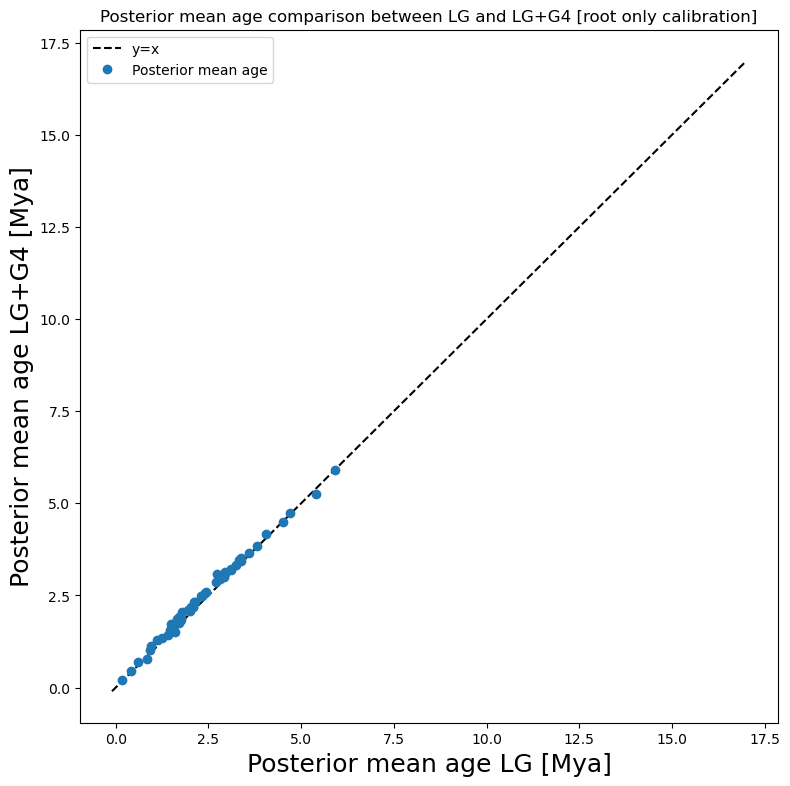

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_ro_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')